#Real-world Data Wrangling: Movie Metadata and Ratings

For this project, the data wrangling capabilities were used to extract, clean, and process real-world film data with the help of several datasets.
The aim is to extract and integrate various sources of data—such as metadata, ratings, and keywords—to gain insights on a relevant research query on movies and their traits.

Throughout the process, you are expected to:
1- Gather data from public sources (including Kaggle and IMDb) using a combination of programmatic and manual download methods.

2-Extract and assess the data programmatically (through code) and graphically (through inspection/plots), focusing on the quality and the structure of the data.

3-Implement a cleaning strategy to handle missing values, inconsistent formats, duplicates, and other common data issues.

4-Save the cleaned data in appropriate data structures (e.g., Pandas DataFrames or a database).

5-Merge the datasets by common keys (e.g., movie IDs or names).

6-Answer the research question from the combined and wrestled-through data with insights incorporating relevant code and visualizations.

Throughout the process, the reasoning behind the choices for data gathering, assessment, cleaning, and storage methods. All the code will be highly commented for reproducibility and readability.

Before starting, installing some of the required packages in needed.


In [30]:
!python -m pip install kaggle==1.6.12


In [ ]:

import os; os.kill(os.getpid(), 9)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import ast
import json

%matplotlib inline


In [2]:
# Display settings (optional for a cleaner notebook look)
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

##1. Gather data:
In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

##1.1. Problem Statement
The objective of this project is to establish the determinants of popularity and ratings of movies. By incorporating metadata, user ratings, and movie keywords from multiple datasets, I would like to establish the characteristics of movies (e.g., genres, keywords, and years of release) that are associated with good user ratings and popularity. The project would utilize datasets found in the public space on Kaggle and IMDb with unique variables on movies, their characteristics, as well as the audience's response.

##1.2. Gather at least two datasets using two different data gathering methods
**Dataset 1**:
*Kaggle Movie Metadata and Ratings*
Gathering method: was downloaded manually from Kaggle
   - *See code and authentication steps in the notebook below.*

**Key variables**:

**movies_metadata.csv**: includes variables such as id, title, genres, release_date, budget, and revenue—critical for analyzing movie characteristics.

**ratings_small.csv**: includes userId, movieId, and rating, capturing individual user ratings for various movies.

**keywords.csv**: includes id and keywords, providing thematic or content-based tags for each movie.


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felwahalarifi","key":"2e6987259cfd2edfc9efb99ff7ff5b17"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d rounakbanik/the-movies-dataset


Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 99% 225M/228M [00:01<00:00, 186MB/s]
100% 228M/228M [00:01<00:00, 205MB/s]


In [8]:
# Extract the contents of the downloaded zip file first
with zipfile.ZipFile('the-movies-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('the-movies-dataset')

# Now read the CSV files from the extracted directory
movies_metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')
ratings = pd.read_csv('the-movies-dataset/ratings.csv')
keywords = pd.read_csv('the-movies-dataset/keywords.csv')

#overview Info and describtion
movies_metadata.info()
ratings.info()
keywords.info()

/tmp/ipython-input-8-2636025868.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

###Dataset 2
*IMDb Title Ratings*

**Gathering method**: was downloaded programmatically using the Kaggle API (see data gathering code cell below).

**Key variables**:

tconst (unique IMDb movie identifier)

averageRating (mean IMDb user rating for the title)

numVotes (number of votes per movie)
These variables are crucial for supplementing the analysis of movie popularity and viewer reception.

**Type**: CSV File.


In [9]:
imdb_ratings = pd.read_csv('/content/drive/MyDrive/Udacity/Second Project/title.ratings.tsv.gz', sep='\t')
# info of the file
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579603 entries, 0 to 1579602
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1579603 non-null  object 
 1   averageRating  1579603 non-null  float64
 2   numVotes       1579603 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.2+ MB


###Store Raw Data Locally

In [10]:
# Create a directory
raw_data_dir = 'raw_data'
os.makedirs(raw_data_dir, exist_ok=True)

# Save the main datasets as CSV
movies_metadata.to_csv(os.path.join(raw_data_dir, 'movies_metadata_raw.csv'), index=False)
ratings.to_csv(os.path.join(raw_data_dir, 'ratings_raw.csv'), index=False)


keywords.to_csv(os.path.join(raw_data_dir, 'keywords_raw.csv'), index=False)

print("Raw datasets saved in the 'raw_data' directory.")

Raw datasets saved in the 'raw_data' directory.


##2. Assess data
Assess the data according to data quality and tidiness metrics using the report below.

**(a) Missing Values (Completeness)**:

Programmatic Assessment:

In [12]:
# Check missing values for all columns
missing_counts = movies_metadata.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0].sort_values(ascending=False))


Missing values per column:
 belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
release_date                87
status                      87
imdb_id                     17
original_language           11
revenue                      6
title                        6
video                        6
vote_average                 6
spoken_languages             6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
dtype: int64


Inspecting the dataframe visually:

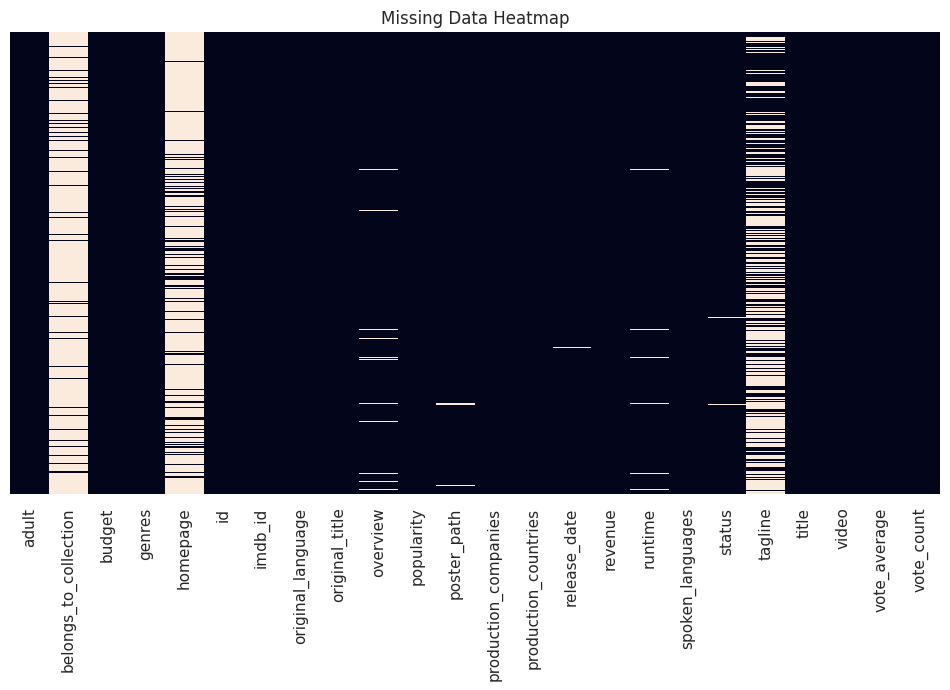

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(movies_metadata.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()


####Issue and justification:

The `isnull().sum()` method showed that several columns have missing values—some extensively (like *belongs\_to\_collection*, *homepage*, and *tagline*), reducing their usefulness, while others (like *runtime*, *release\_date*, *imdb\_id*, *title*, and *vote\_average*) are essential and even minor gaps in them can hinder analysis or merging. This highlights the importance of identifying and prioritizing which missing data to address based on its impact.



**(b) Data Types and Invalid Values (Validity/Accuracy)**

Programmatic Assessment:


In [15]:
# Check data types
print(movies_metadata.dtypes)

#Check 'budget' for non-numeric values
print(movies_metadata['budget'].unique()[:10])

# Try converting to numeric and see what fails
non_numeric_budgets = movies_metadata[~movies_metadata['budget'].str.isnumeric()]
print("Examples of non-numeric budgets:\n", non_numeric_budgets['budget'].head())


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
['30000000' '65000000' '0' '16000000' '60000000' '58000000' '35000000'
 '62000000' '44000000' '98000000']
Examples of non-numeric budgets:
 19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV

Inspecting the dataframe visually:

In [16]:
# View a sample of problematic column entries
print(movies_metadata[['budget']].sample(10))


         budget
27250         0
26290         0
12969         0
1603   30000000
35106         0
191     7000000
25772         0
28972         0
24394         0
18721  10000000


####Issue and justification:
The 'budget' and 'popularity' columns are stored as strings instead of numeric types, preventing accurate analysis. Some entries in 'budget' are invalid, such as zeros or image paths. These issues were detected by checking data types and inspecting values, showing the need to clean and convert these columns for proper analysis.


###2. Data Tidiness Assessment

**(a) Multiple Variables in a Single Column**

Programmatic Assessment:

In [17]:
print(movies_metadata['genres'].head())

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object


Inspecting the dataframe visually

In [18]:
# Display the full first entry for clarity
print(movies_metadata['genres'].iloc[0])


[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


**Issues and justifications:**

The genres column is not tidy because it contains multiple variables (IDs and names of genres) in a single cell as a stringified list of dictionaries. This violates the tidy data rule that each variable should have its own column, making analysis difficult without further parsing. This issue was identified by visually inspecting the column using `.head()`.


**(b) Different Observational Units in Separate Tables**:

Programmatic Assessment:


In [19]:
# Check existence of join/merge key in both dataframes
print(movies_metadata['imdb_id'].head())
print(imdb_ratings['tconst'].head())


0    tt0114709
1    tt0113497
2    tt0113228
3    tt0114885
4    tt0113041
Name: imdb_id, dtype: object
0    tt0000001
1    tt0000002
2    tt0000003
3    tt0000004
4    tt0000005
Name: tconst, dtype: object


Inspecting the dataframe visually

In [20]:
# Describe the structure of both dataframes in markdown or use .info()
movies_metadata.info()
imdb_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

**Issue and justification:**

The paragraph explains that the `imdb_id` and `tconst` columns serve as unique movie identifiers in two separate dataframes—one with movie attributes and the other with ratings. Since related information is split, this breaks the tidy data principle. Therefore, merging the tables is necessary for proper analysis, making data integration a key cleaning step.


##3. Data Cleaning

make copies of datasets to ensure the raw dataframes are not impacted

In [21]:

meta_clean = movies_metadata.copy()
imdb_ratings_clean = imdb_ratings.copy()


**Quality Issue 1: Missing Values in Critical Columns**

Strategy: Drop rows where critical fields (*imdb_id, title, release_date,* or *vote_average*) are missing, as these are essential for analysis or merging

In [22]:
# Drop rows with missing critical fields
critical_cols = ['imdb_id', 'title', 'release_date', 'vote_average']
meta_clean = meta_clean.dropna(subset=critical_cols)

# Validate: Check for remaining missing values in those columns
print(meta_clean[critical_cols].isnull().sum())


imdb_id         0
title           0
release_date    0
vote_average    0
dtype: int64


**Justification**:

Rows missing identifiers or required variables cannot be merged with ratings data or meaningfully analyzed, so it is better to remove them.

**Quality Issue 2: Non-numeric and Invalid Values in budget**

Strategy:
Convert budget to numeric, coercing errors to NaN, then either fill or drop rows as needed (here, we’ll set non-numeric budgets to 0 for simplicity).

In [23]:
# Convert budget to numeric, invalid parsing will be set as NaN
meta_clean['budget'] = pd.to_numeric(meta_clean['budget'], errors='coerce').fillna(0)

# Validate: Confirm all budget values are numeric and check for negatives or NaN
print(meta_clean['budget'].dtype)
print(meta_clean['budget'].isnull().sum())
print(meta_clean['budget'].describe())


int64
0
count    4.536200e+04
mean     4.233889e+06
std      1.744240e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64


**Justification**:

Numeric analysis of budget is only possible if the column is numeric. Setting invalid or missing values to 0 is common when the actual value is unknown.

**Tidiness Issue 1: Multiple Variables in a Single Column**

Strategy:
Parse the genres string to extract genre names into a new column as a list.

In [24]:
def parse_genres(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [g['name'] for g in genres]
    except (ValueError, SyntaxError, TypeError):
        return []

meta_clean['genres_list'] = meta_clean['genres'].apply(parse_genres)

# Validate: Show a sample of the new column
print(meta_clean[['genres', 'genres_list']].head())

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                    genres_list  
0   [Animation, Comedy, Family]  
1  [Adventure, Fantasy, Family]  
2             [Romance, Comedy]  
3      [Comedy, Drama, Romance]  
4                      [Comedy]  


**Justification:**
Parsing genres into a list makes it easy to analyze movies by genre, filter, or group by specific genres.

**Tidiness Issue 2: Different Observational Units (Separate Tables)**

Strategy:
Merge the movie metadata with IMDb ratings on the matching movie identifier (imdb_id and tconst).

In [25]:
# Prepare both columns for merging
meta_clean['imdb_id'] = meta_clean['imdb_id'].astype(str)
imdb_ratings_clean['tconst'] = imdb_ratings_clean['tconst'].astype(str)

# Merge the two dataframes
final_df = pd.merge(meta_clean, imdb_ratings_clean, left_on='imdb_id', right_on='tconst', how='inner')

# Validate: Show the shape and columns of the merged dataframe
print(final_df.shape)
print(final_df[['imdb_id', 'title', 'averageRating', 'numVotes', 'budget', 'genres_list']].head())


(45308, 28)
     imdb_id                        title  averageRating  numVotes    budget  \
0  tt0114709                    Toy Story            8.3   1126582  30000000   
1  tt0113497                      Jumanji            7.1    397571  65000000   
2  tt0113228             Grumpier Old Men            6.7     30838         0   
3  tt0114885            Waiting to Exhale            6.0     12928  16000000   
4  tt0113041  Father of the Bride Part II            6.1     43357         0   

                    genres_list  
0   [Animation, Comedy, Family]  
1  [Adventure, Fantasy, Family]  
2             [Romance, Comedy]  
3      [Comedy, Drama, Romance]  
4                      [Comedy]  


**Justification:**

Combining the datasets allows you to directly relate movie attributes to audience ratings, which is the core of your analysis.



**Remove Unnecessary Variables and Ensure at Least 4 Variables Remain**

Strategy:
Select only the variables needed for your analysis. Example: imdb_id, title, genres_list, budget, release_date, averageRating, numVotes.

In [26]:
columns_to_keep = ['imdb_id', 'title', 'genres_list', 'budget', 'release_date', 'averageRating', 'numVotes']
final_cleaned_df = final_df[columns_to_keep]

# Validate: Show the final dataframe
print(final_cleaned_df.info())
print(final_cleaned_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45308 entries, 0 to 45307
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        45308 non-null  object 
 1   title          45308 non-null  object 
 2   genres_list    45308 non-null  object 
 3   budget         45308 non-null  int64  
 4   release_date   45308 non-null  object 
 5   averageRating  45308 non-null  float64
 6   numVotes       45308 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ MB
None
     imdb_id                        title                   genres_list  \
0  tt0114709                    Toy Story   [Animation, Comedy, Family]   
1  tt0113497                      Jumanji  [Adventure, Fantasy, Family]   
2  tt0113228             Grumpier Old Men             [Romance, Comedy]   
3  tt0114885            Waiting to Exhale      [Comedy, Drama, Romance]   
4  tt0113041  Father of the Bride Part II             

###4. Update Your Data Store


In [27]:
# Make sure we have a dedicated directory for cleaned data
cleaned_data_dir = 'cleaned_data'
os.makedirs(cleaned_data_dir, exist_ok=True)

# Save the cleaned, merged dataset with an informative name
final_cleaned_df.to_csv(os.path.join(cleaned_data_dir, 'movies_with_ratings_cleaned.csv'), index=False)

print("Cleaned dataset saved as 'movies_with_ratings_cleaned.csv' in the 'cleaned_data' directory.")


Cleaned dataset saved as 'movies_with_ratings_cleaned.csv' in the 'cleaned_data' directory.


##5. Answer the Research Question
Research Question:
Which movie characteristics (such as genre, budget, and release year) are most strongly associated with higher audience ratings?

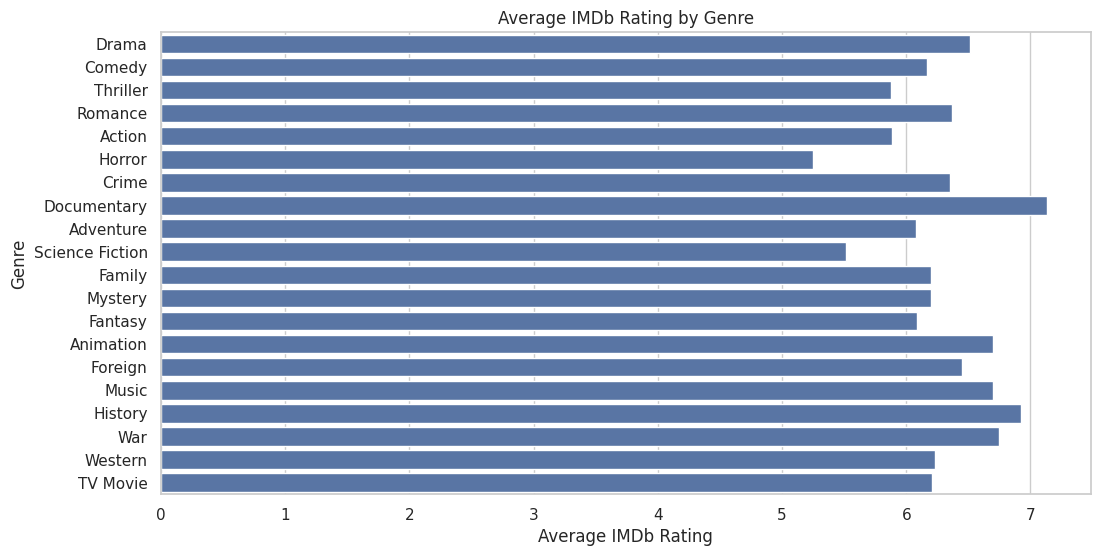

In [28]:
# Explode genres_list
genre_ratings = final_cleaned_df.explode('genres_list')

# Calculate mean rating per genre (for genres with enough data)
genre_mean = genre_ratings.groupby('genres_list')['averageRating'].mean().sort_values(ascending=False)
genre_counts = genre_ratings['genres_list'].value_counts()
popular_genres = genre_counts[genre_counts > 100].index  # Only genres with >100 movies

plt.figure(figsize=(12,6))
sns.barplot(x=genre_mean.loc[popular_genres], y=popular_genres, orient='h')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.title('Average IMDb Rating by Genre')
plt.show()


**Answer to research question:**

This bar plot shows how average ratings vary by genre. For example, genres such as *Documentary* and *History* tend to have higher average ratings, while genres like *Horror* and *Thriller* often receive lower ratings. This suggests that certain genres are more likely to be highly rated by audiences.

Relationship Between Budget and Audience Rating

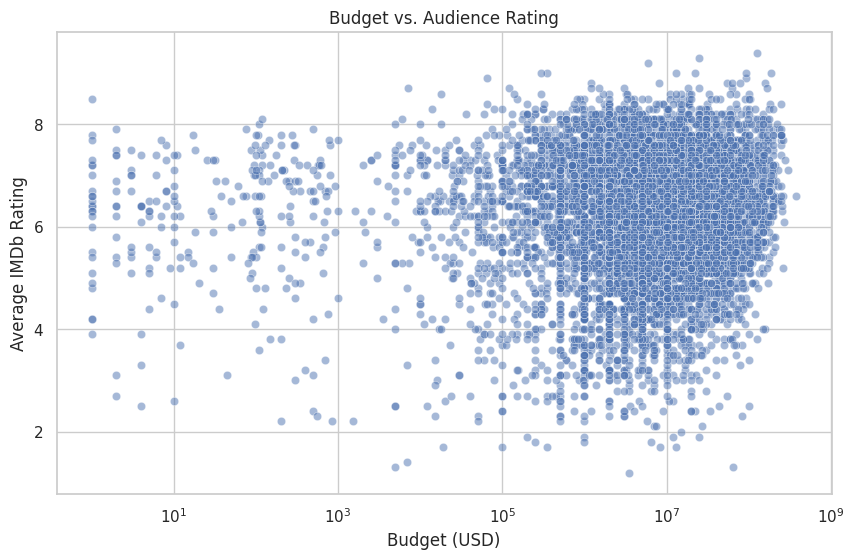

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_cleaned_df, x='budget', y='averageRating', alpha=0.5)
plt.xlabel('Budget (USD)')
plt.ylabel('Average IMDb Rating')
plt.title('Budget vs. Audience Rating')
plt.xscale('log')  # Budget varies by orders of magnitude
plt.show()


**Answer to research question:**

This scatterplot visualizes the relationship between a film’s budget and its audience rating. There is no clear linear correlation: both low- and high-budget movies can receive high or low ratings. This indicates that simply spending more money on a film does not guarantee a higher audience rating.



##5.2 Reflection
If I had more time, I would investigate additional variables such as the influence of release year, production country, or director on movie ratings. I would also work on more robust handling of missing and anomalous values, especially in the budget and revenue columns, and perhaps include more granular genre or keyword analysis. Further, I would experiment with modeling techniques (e.g., regression analysis) to quantify the impact of different features on audience ratings.